# Amazon Food Reviews Analysis 


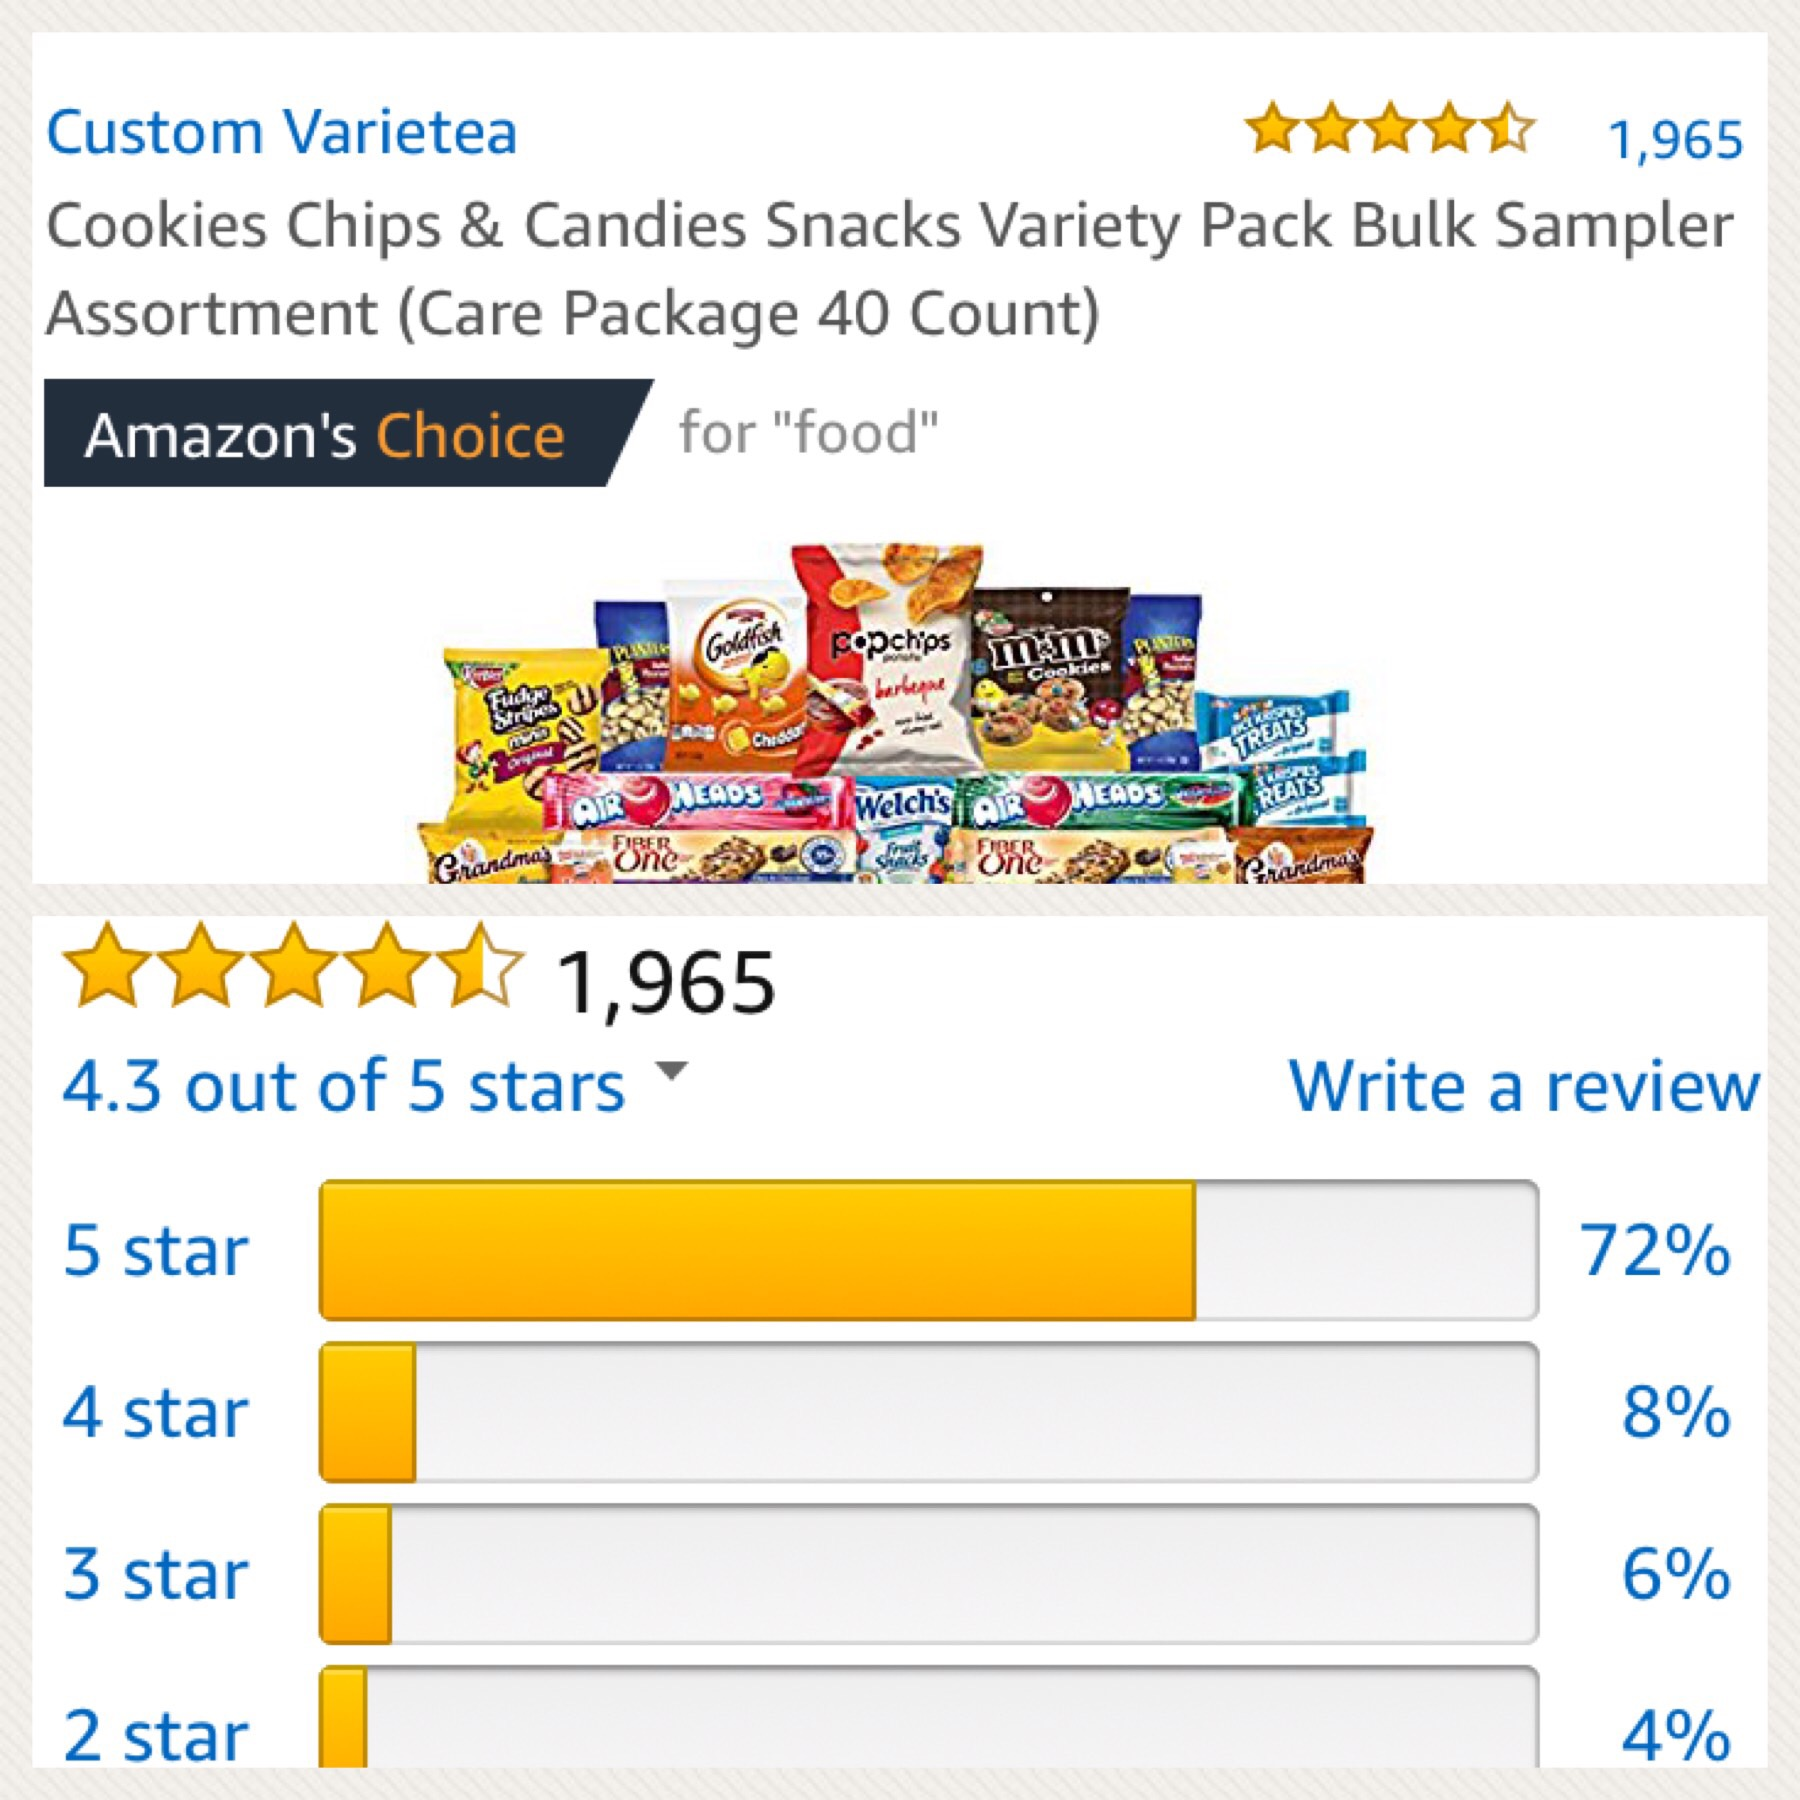

In [1]:
from IPython.display import Image
Image(filename='amazon.png')
Image(filename='IMG_3294.JPG')

### <font color='brown'>How often do you shop on Amazon ?<br> <br> Have you ever hesitated to buy something if you see a negative reivew ? <br> <br> After you read some positive reviews, you decide to buy the product and then notice the reviews are categorized as "not helpful," will this change your decision about purchasing the product?

# Project Overview 

Background: Recently more and more Amazon sellers realized how customers’ reviews can impact other buyers’ decision making. Since most of customers will hesitate to make a purchase decision if the product has a negative review.  As an analyst, my goal is to help the business to provide the good shopping experience. So, I want to develop the model to predict if a review is helpful or not helpful from sentiment analysis.  Then the modeling outcome will help Amazon’s merchants have better understand about customers’ attitudes towards reviews.<br>

The purpose of this analysis is to build a prediction model where we will be able to predict whether a review is helpful or notheful.

In [3]:
%matplotlib inline
import numpy as np 
import pandas as pd 
from pandas import Series, DataFrame, datetime
from subprocess import check_output
from datetime import datetime, timedelta, time
import nltk
import string
import matplotlib.pyplot as plt
import matplotlib as cm
import seaborn as sns

# Setup Pandas
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

# 1. Data Preparation 

## Clean Numeric Data
+ Clean missing value
+ Check duplicate 
+ Find out some interesting EDA

In [4]:
amazon = pd.read_csv('Reviews.csv',index_col=0)
amazon.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
Id,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


+ Id
+ ProductId - unique identifier for the product
+ UserId - unqiue identifier for the user
+ ProfileName
+ HelpfulnessNumerator - number of users who found the review helpful
+ HelpfulnessDenominator - number of users who indicated whether they found the review helpful
+ Score - rating between 1 and 5
+ Time - timestamp for the review
+ Summary - brief summary of the review
+ Text - text of the review

In [5]:
#check number of observations and row
print (amazon.shape)

(568454, 9)


In [6]:
#check missing value 
amazon.isnull().sum()

ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   26
Text                       0
dtype: int64

In [7]:
# Since majority of data has value, we can just remove missing values
amazon= amazon.dropna(subset=['ProfileName','Summary'])
amazon.isnull().sum()

ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [8]:
#check number of observations and row after removed missing value
print (amazon.shape)

(568412, 9)


In [9]:
# covert time
amazon['date_time']=pd.to_datetime(amazon['Time'],unit='s')
amazon['date']=pd.to_datetime(amazon['date_time'],unit='d')
amazon['date1'] = pd.to_datetime(amazon['date'])
amazon['year']=amazon.date1.dt.year
amazon.date_time.describe()

count                  568412
unique                   3168
top       2012-10-16 00:00:00
freq                     1143
first     1999-10-08 00:00:00
last      2012-10-26 00:00:00
Name: date_time, dtype: object

In [10]:
# check HelpfulnessDenominator
amazon.HelpfulnessDenominator.describe()

count    568412.000000
mean          2.227872
std           8.288745
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max         923.000000
Name: HelpfulnessDenominator, dtype: float64

In [11]:
# check percentage of Helpful
amazon['Helpful_pct'] = amazon['HelpfulnessNumerator'] / amazon['HelpfulnessDenominator']
amazon.loc[amazon.HelpfulnessDenominator==0,'Helpful_pct']=0
amazon['Helpful_pct'].describe()

count    568412.000000
mean          0.407883
std           0.462073
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           3.000000
Name: Helpful_pct, dtype: float64

In [12]:
# divided the reviews into four categories
def partition(x):
    if x >=0.75:
        return '75'
    elif x>=0.5:
        return '50'
    elif x>=0.25 :
        return '25'
    return '0'
amazon['help1'] = amazon['Helpful_pct'].map(partition)
amazon['help1'].describe()

count     568412
unique         4
top            0
freq      308295
Name: help1, dtype: object

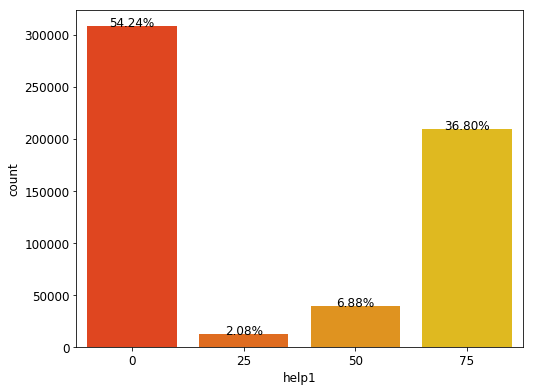

In [78]:
plt.figure(figsize=(8,6))
total = float(len(amazon)) 
ax = sns.countplot(x="help1",palette='autumn', data=amazon) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
plt.show()

#### <font color='gray'> Among all reviews, more then 50% are not voted on at all. More than 35% of voters find the review helpful.

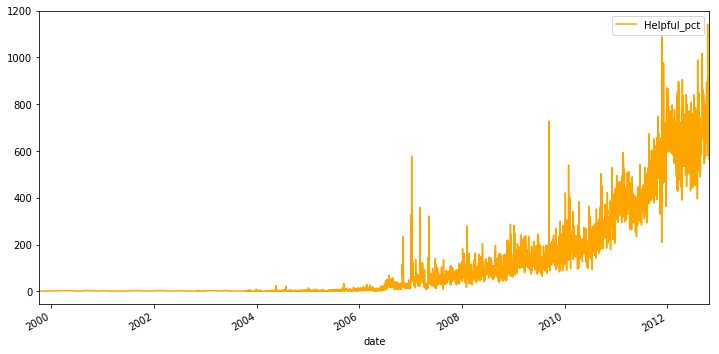

In [14]:
## Helpfulness count, reviews has increased 
time1=amazon[['date','Helpful_pct']].copy()
time1['Helpful_pct']=amazon.groupby(['date']).Helpful_pct.transform('count')
time1.set_index(['date'],inplace=True)
time1.sort_index(inplace=True)
time1.plot(color='orange',figsize=(12,6))
plt.show()

#### <font color='gray'> 1. After remove missing value the dataset contains 568,412 food reviews from Amazon users left from 1999 Oct to 2012 Oct. <BR> 2. Reviews has increased over years.

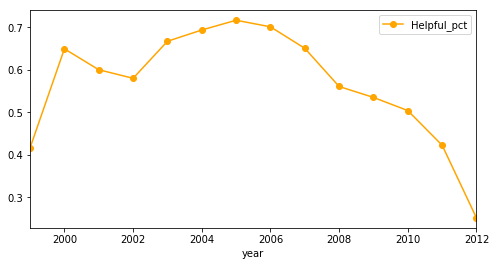

In [15]:
avg_help_pct=amazon.groupby(['year']).Helpful_pct.mean().reset_index().sort_values(by='year')
avg_help_pct.plot(x='year',y='Helpful_pct',marker='o', color='orange',figsize=(8,4))
plt.show()

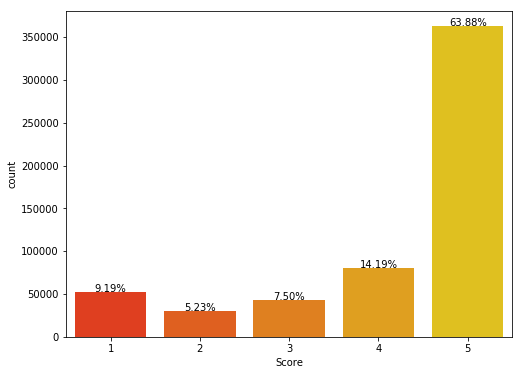

In [16]:
plt.figure(figsize=(8,6))
total = float(len(amazon)) 
ax = sns.countplot(amazon['Score'],color="orange",palette='autumn') 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
plt.show()

In [17]:
print("Average Score: ",np.mean(amazon.Score))
print("Median Score: ",np.median(amazon.Score))

Average Score:  4.183307178595808
Median Score:  5.0


####  $\star$ <font color='gray'> The distribution of rating among all of the reviews. We see that 5-star reviews constitute a large proportion (64%) of all reviews. The next most prevalent rating is 4-stars(14%), followed by 1-star (9%), 3-star (8%), and finally 2-star reviews (5%). Majority of Scores are around 4 to 5, and average score is 4.18. The distribution is very skewed to the left. 

#### Summary of dataset statistics 
+ Number of reviews : 393,566
+ Number of unique users : 256,048 
+ Number of unique products :74,258

In [18]:
review= amazon['UserId'].groupby(amazon['Text']).count()
print(review.count())
User= amazon['Score'].groupby(amazon['UserId']).count()
print(User.count())
products = amazon['Score'].groupby(amazon['ProductId']).count()
print(products.count())

393566
256048
74258


In [19]:
amazon['chk']=amazon.duplicated(['Text'])
amazon['chk'].sum()

174846

## Cleaning Text
+ Lower case 
+ Removing punctuation and stopwords
+ Text visualization

In [20]:
from scipy.misc import imread
from PIL import Image
import numpy as np
import re
import matplotlib as mpl
from wordcloud import WordCloud
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
nltk.download('stopwords')
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mirabooboo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mirabooboo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
def clean_text1(text, remove_stopwords = True):
    '''Remove stopwords'''
    
    # Convert words to lower case
    text = text.lower()
    # Optionally, remove stop words
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)
        
    return text

In [22]:
amazon["Summary1"] = amazon["Summary"].apply(clean_text1)

In [23]:
lemmatizer = nltk.WordNetLemmatizer()
stemmer = PorterStemmer()
stop = stopwords.words('english')
def clean_text2(line):
    tokens=[]
    line= re.sub(r'<br />', ' ', line)
    line= re.sub(r'\<a href', ' ', line)
    line= re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', line)
    line= re.sub(r'&amp;', '', line) 
    line= nltk.word_tokenize(line.lower())
#   line = line.translate(translation)
    for w in line:
        if(w not in stop):
#             stemmed = stemmer.stem(w)
            stemmed = lemmatizer.lemmatize(w)
            tokens.append(stemmed)
    return ' '.join(tokens)

In [24]:
amazon["text_Clean1"] = amazon["Text"].apply(clean_text2)

In [25]:
amazon["text_Clean1"].iloc[26]

'candy red flavor plan chewy would never buy'

In [26]:
amazon["word_cnt"] = amazon['Text'].str.split().str.len()
amazon["word_cnt"].describe()

count    568412.000000
mean         80.267303
std          79.457074
min           3.000000
25%          33.000000
50%          56.000000
75%          98.000000
max        3432.000000
Name: word_cnt, dtype: float64

####  <font color='gray'> Each reivew contains approximately 80 words.

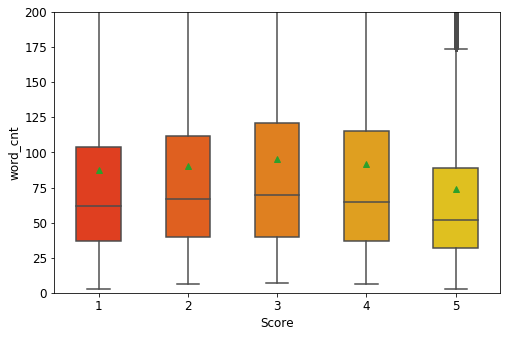

In [37]:
plt.figure(figsize=(8,5))
plt.ylim(0, 200)
# Change line width
sns.boxplot( x=amazon["Score"], y=amazon["word_cnt"], showmeans=True, width=0.5,palette='autumn')
plt.show()

#### <font color='gray'> 5-star reviews had the lowest median word count and 3-star reviews had the largest median word count.

In [28]:
# save clean data 
amazon.to_csv('amazon_clean.csv')

## Word cloud for all reviews

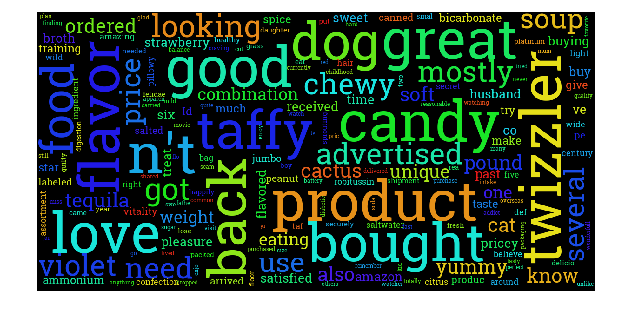

In [29]:
from colormap import Colormap
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
from os import path
import os
mpl.rcParams['font.size']=12                
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        font_path=os.path.join('fonts', 'RobotoSlab-Regular.ttf'),
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
#         Colormap="terrain",
        scale=3
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(10, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=14)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(amazon["text_Clean1"]) 

## Low Score reviews word cloud 

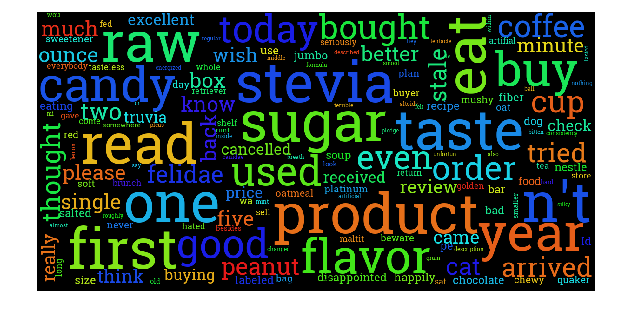

In [30]:
show_wordcloud(amazon[amazon.Score == 1]["text_Clean1"], title = "score 1")

## High Score reviews word cloud

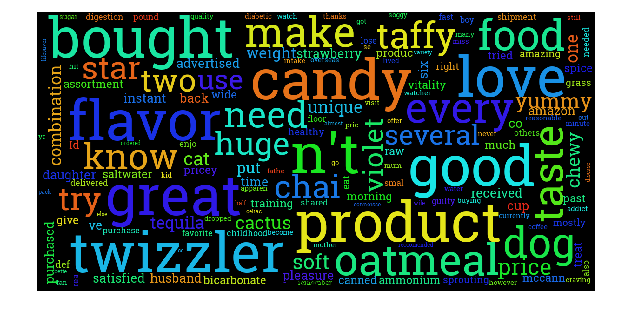

In [31]:
show_wordcloud(amazon[amazon.Score == 5]["text_Clean1"], title = "score 5")

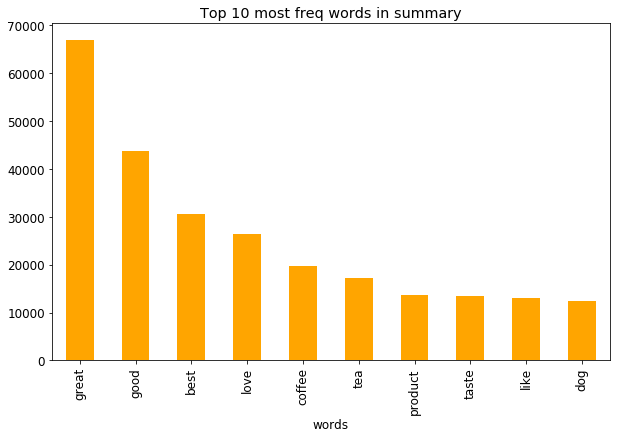

In [34]:
word_his = pd.DataFrame(Counter(" ".join(amazon['Summary1']).split()).most_common(10),columns=['words','count'])
word_his.plot(kind='bar',x=word_his['words'],legend=False,title='Top 10 most freq words in summary',figsize=(10,6), color="orange")
plt.show()

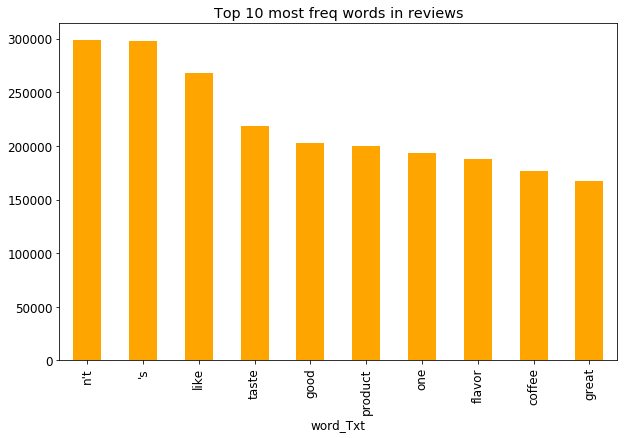

In [35]:
word_Txt_his = pd.DataFrame(Counter(" ".join(amazon['text_Clean1']).split()).most_common(10),columns=['word_Txt','count'])
word_Txt_his.plot(kind='bar',x=word_Txt_his['word_Txt'],legend=False,title='Top 10 most freq words in reviews',figsize=(10,6), color="orange")
plt.show()

#### Further analysis : <br> Does the behavior of frequent reviewers differ from that of infrequent reviewers?